# Librerias

In [1]:
import os
import seaborn as sns
import pandas as pd
import warnings
import statsmodels.api as sm
from tabulate import tabulate
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

warnings.filterwarnings("ignore", category=FutureWarning)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Modulos

In [2]:
modulo_hogar = pd.read_stata("../input/enaho01-2020-100.dta", convert_categoricals=False)
columnas_interes = ['conglome','vivienda','hogar','ubigeo','p1121','p1123','p1124','p1125','p1126','p1127',
                    'p1142','p1144']
modulo_hogar = modulo_hogar[columnas_interes]

# Variables de interés: Parentesco Sexo y Edad
modulo_miembros = pd.read_stata("../input/enaho01-2020-200.dta", convert_categoricals=False)
columnas_interes_miembros = ['conglome','vivienda','hogar','ubigeo','codperso',"p203b","p207",'p208a']
modulo_miembros = modulo_miembros[columnas_interes_miembros]

# Variables de interés
modulo_educa = pd.read_stata("../input/enaho01a-2020-300.dta", convert_categoricals=False)
columnas_interes_educa = ['conglome','vivienda','hogar','codperso','ubigeo','dominio','estrato',"p301c","p300a","p304b","p304a",
                          "p308c","p308b",
    "p307a1","p307a2","p307a3","p307a4","p307a4_5","p307a4_6","p307a4_7","p307b1","p307b2","p307b3","p307b4","p307b4_5","p307b4_6","p307b4_7",
    "p308a","p308d","p314a","p314b_1","p314b_2","p314b_3","p314b_4","p314b_5","p314b_6","p314b_7",
    "p314b1_1","p314b1_2","p314b1_8","p314b1_9","p314b1_6","p314b1_7","p314d","p316_1","p316_2", "p316_3","p316_4","p316_5",
    "p316_6","p316_7","p316_8","p316_9","p316_10","p316_11","p316_12","p316a1","p316b","p316c1","p316c2","p316c3","p316c4",
    "p316c5","p316c6","p316c7","p316c8","p316c9","p316c10","t313a", "factor07"]
modulo_educa = modulo_educa[columnas_interes_educa]

sumaria = pd.read_stata("../input/sumaria-2020.dta", convert_categoricals=False)
columnas_interes_sumaria = ['conglome', 'vivienda', 'hogar','ubigeo','estrsocial','mieperho','totmieho']
sumaria = sumaria[columnas_interes_sumaria]

## Merge

In [3]:
# Realizar el merge version final 2
# Primero, unir modulo_hogar y modulo_miembros usando las columnas comunes
merged_data1 = pd.merge(modulo_educa, modulo_miembros, on=['conglome', 'vivienda', 'hogar', 'ubigeo','codperso'], how='inner')

# Luego, unir el resultado anterior con modulo_educa
merged_data2 = pd.merge(sumaria, modulo_hogar, on=['conglome', 'vivienda', 'hogar', 'ubigeo'], how='inner')

# Finalmente, unir el resultado anterior con sumaria
merged_data = pd.merge(merged_data1, merged_data2, on=['conglome', 'vivienda', 'hogar', 'ubigeo'], how='left')

In [4]:
print(merged_data.shape)

(115777, 84)


In [5]:
print(merged_data.columns)

Index(['conglome', 'vivienda', 'hogar', 'codperso', 'ubigeo', 'dominio',
       'estrato', 'p301c', 'p300a', 'p304b', 'p304a', 'p308c', 'p308b',
       'p307a1', 'p307a2', 'p307a3', 'p307a4', 'p307a4_5', 'p307a4_6',
       'p307a4_7', 'p307b1', 'p307b2', 'p307b3', 'p307b4', 'p307b4_5',
       'p307b4_6', 'p307b4_7', 'p308a', 'p308d', 'p314a', 'p314b_1', 'p314b_2',
       'p314b_3', 'p314b_4', 'p314b_5', 'p314b_6', 'p314b_7', 'p314b1_1',
       'p314b1_2', 'p314b1_8', 'p314b1_9', 'p314b1_6', 'p314b1_7', 'p314d',
       'p316_1', 'p316_2', 'p316_3', 'p316_4', 'p316_5', 'p316_6', 'p316_7',
       'p316_8', 'p316_9', 'p316_10', 'p316_11', 'p316_12', 'p316a1', 'p316b',
       'p316c1', 'p316c2', 'p316c3', 'p316c4', 'p316c5', 'p316c6', 'p316c7',
       'p316c8', 'p316c9', 'p316c10', 't313a', 'factor07', 'p203b', 'p207',
       'p208a', 'estrsocial', 'mieperho', 'totmieho', 'p1121', 'p1123',
       'p1124', 'p1125', 'p1126', 'p1127', 'p1142', 'p1144'],
      dtype='object')


# Variables

### Departamento

In [6]:
# Crear una variable "departamento" extrayendo los primeros 2 dígitos de "ubigeo"
merged_data["DEPARTAMENTO"] = merged_data["ubigeo"].astype(str).str[:2]
merged_data["DEPARTAMENTO"] = pd.to_numeric(merged_data["DEPARTAMENTO"], errors="coerce")

# Recodificar la variable "departamento" para asignar nombres a los códigos numéricos
#dict_departamento = {
#    1: "Amazonas", 2: "Ancash", 3: "Apurímac", 4: "Arequipa", 5: "Ayacucho", 6: "Cajamarca", 7: "Callao", 8: "Cusco",
#    9: "Huancavelica", 10: "Huánuco", 11: "Ica", 12: "Junín", 13: "La Libertad", 14: "Lambayeque", 15: "Lima",
#    16: "Loreto", 17: "Madre de Dios", 18: "Moquegua", 19: "Pasco", 20: "Piura", 21: "Puno", 22: "San Martín", 
#    23: "Tacna", 24: "Tumbes", 25: "Ucayali"
#}
#merged_data["DEPARTAMENTO"].replace(dict_departamento, inplace=True)

### Area e Idioma

In [7]:
# Recodificar la variable "estrato" para crear la variable "area"
merged_data["AREA"] = merged_data["estrato"].apply(lambda x: 1 if 1 <= x <= 5 else 0) #{1: "Urbano", 0: "Rural"}

# IDIOMA 
merged_data["Idioma"] = merged_data["p300a"].apply(lambda x: 1 if 4 == x  else 0)   # {1: "Castellano", 0: "Otros"}
#1 Quechua 2 Aimara 3 Otra lengua nativa 4 Castellano 6 Portugués 7 Otra lengua extranjera 
# 8 No escucha/no habla9 Lengua de señas peruanas 10 Ashaninka 11 Awajun/Aguaruna 12 Shipibo-Konibo 
# 13 Shawi/Chayahuita 14 Matsigenka/Machiguenga 15 Achuar

### Zona

In [8]:
# Recodificar la variable "dominio" para crear la variable "zona"
#dict_zona = { 1:"Costa", 2:"Costa", 3: "Costa", 4:"Sierra", 5:"Sierra", 6:"Sierra", 7:"Selva", 8: "Lima Metropolitana"}
dict_zona = { 1:1, 2:1, 3: 1, 4:2, 5:2, 6:2, 7:3, 8: 4}
merged_data["ZONA"] = merged_data["dominio"].map(dict_zona)

In [9]:
print(merged_data.p308d.value_counts())

1.0    25896
2.0     6224
Name: p308d, dtype: int64


In [10]:
print(merged_data.columns)

Index(['conglome', 'vivienda', 'hogar', 'codperso', 'ubigeo', 'dominio',
       'estrato', 'p301c', 'p300a', 'p304b', 'p304a', 'p308c', 'p308b',
       'p307a1', 'p307a2', 'p307a3', 'p307a4', 'p307a4_5', 'p307a4_6',
       'p307a4_7', 'p307b1', 'p307b2', 'p307b3', 'p307b4', 'p307b4_5',
       'p307b4_6', 'p307b4_7', 'p308a', 'p308d', 'p314a', 'p314b_1', 'p314b_2',
       'p314b_3', 'p314b_4', 'p314b_5', 'p314b_6', 'p314b_7', 'p314b1_1',
       'p314b1_2', 'p314b1_8', 'p314b1_9', 'p314b1_6', 'p314b1_7', 'p314d',
       'p316_1', 'p316_2', 'p316_3', 'p316_4', 'p316_5', 'p316_6', 'p316_7',
       'p316_8', 'p316_9', 'p316_10', 'p316_11', 'p316_12', 'p316a1', 'p316b',
       'p316c1', 'p316c2', 'p316c3', 'p316c4', 'p316c5', 'p316c6', 'p316c7',
       'p316c8', 'p316c9', 'p316c10', 't313a', 'factor07', 'p203b', 'p207',
       'p208a', 'estrsocial', 'mieperho', 'totmieho', 'p1121', 'p1123',
       'p1124', 'p1125', 'p1126', 'p1127', 'p1142', 'p1144', 'DEPARTAMENTO',
       'AREA', 'Idioma', 

## Renombrar variables

In [11]:
# Rename columns
new_column_names = {'p308a': 'Nivel_educativo', 'p308d': 'Centro_estudios','p207': 'Sexo', 'p208a':"Edad",'p1121':'Electricidad',
'p314a': 'i_uso','p314b_1':'i_uso_hog', 'p314b_2':'i_uso_trab', 'p314b_3':'i_uso_cedu','p314b_4':'i_uso_cab','p314b_5':'i_uso_casotr',
'p314b_6':'i_uso_otro','p314b_7':'i_uso_movil',
'p314b1_1':'i_computadora','p314b1_2':'i_laptop','p314b1_5':'i_cel_trab','p314b1_6':'i_tablet',
'p314b1_7':'i_otro','p314b1_8': 'i_cel_sdatos', 'p314b1_9': 'i_cel_cdatos',
"p307a1":"clases_tv","p307a2":"clases_radio", "p307a3":"clases_plataforma_virtual","p307a4":"clases_otro","p307a4_5":"clases_wsp", "p307a4_6":"clases_correo",
"p307a4_7":"clases_llamadas","p307b1":"clases_interaccion_profesor", "p307b2":"clases_videos","p307b3":"clases_documentos", "p307b4":"clases_otros",
"p307b4_5":"clases_msm_audio","p307b4_6": "clases_msm_texto", "p307b4_7":"clases_sin_acompañamiento"}
merged_data.rename(columns=new_column_names, inplace=True)

# Now, the DataFrame has renamed columns
print(merged_data.columns)

Index(['conglome', 'vivienda', 'hogar', 'codperso', 'ubigeo', 'dominio',
       'estrato', 'p301c', 'p300a', 'p304b', 'p304a', 'p308c', 'p308b',
       'clases_tv', 'clases_radio', 'clases_plataforma_virtual', 'clases_otro',
       'clases_wsp', 'clases_correo', 'clases_llamadas',
       'clases_interaccion_profesor', 'clases_videos', 'clases_documentos',
       'clases_otros', 'clases_msm_audio', 'clases_msm_texto',
       'clases_sin_acompañamiento', 'Nivel_educativo', 'Centro_estudios',
       'i_uso', 'i_uso_hog', 'i_uso_trab', 'i_uso_cedu', 'i_uso_cab',
       'i_uso_casotr', 'i_uso_otro', 'i_uso_movil', 'i_computadora',
       'i_laptop', 'i_cel_sdatos', 'i_cel_cdatos', 'i_tablet', 'i_otro',
       'p314d', 'p316_1', 'p316_2', 'p316_3', 'p316_4', 'p316_5', 'p316_6',
       'p316_7', 'p316_8', 'p316_9', 'p316_10', 'p316_11', 'p316_12', 'p316a1',
       'p316b', 'p316c1', 'p316c2', 'p316c3', 'p316c4', 'p316c5', 'p316c6',
       'p316c7', 'p316c8', 'p316c9', 'p316c10', 't313a', 'fac

In [12]:
#base_final["P300A"].dtype

In [13]:
# Uso de Internet en el hogar
merged_data["i_uso_hog"] = pd.to_numeric(merged_data["i_uso_hog"], errors="coerce")

In [14]:
# Uso de Internet 
merged_data["i_uso"] = pd.to_numeric(merged_data["i_uso"], errors="coerce")

## Filtrar variables

In [15]:
# DESCRIPTIVOS DE LAS VARIABLES  # FILTROS DE EDUCACION Y EDAD
# Filtrar el DataFrame para incluir solo las filas con valores 1, 2 o 3 en la columna "P308A"
base_filtrada = merged_data[merged_data["Nivel_educativo"].isin([1, 2, 3])]
# Convertir la columna "P208A" a tipo numérico (si es posible)
base_filtrada["Edad"] = pd.to_numeric(base_filtrada["Edad"], errors="coerce")

# Filtrar las filas donde "P208A" es menor que 18
base_filtrada = base_filtrada[base_filtrada["Edad"] <= 18]

C:\Users\SINERGY TECH\AppData\Local\Temp\ipykernel_2092\2784818831.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_filtrada["Edad"] = pd.to_numeric(base_filtrada["Edad"], errors="coerce")


In [16]:
base_filtrada.head(1)

,conglome,vivienda,hogar,codperso,ubigeo,dominio,estrato,p301c,p300a,p304b,...,p1124,p1125,p1126,p1127,p1142,p1144,DEPARTAMENTO,AREA,Idioma,ZONA
8,005009,098,11,05,010101,4,4,NaN,4.0,4.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1,1,1,2


## Funciones

In [17]:
def generar_tabla_recuento(dataframe, variable, descripcion_valores, guardar_como_jpeg=False, guardar_como_txt=False):
    # Agrupa los datos por la columna 'variable' y suma 'factor07'
    freq_ = dataframe[['factor07', variable]].groupby(variable).sum().reset_index()
    
    # Calcular el porcentaje y redondearlo a dos decimales directamente en esta línea
    total_recuento = freq_['factor07'].sum()
    freq_['Porcentaje'] = (freq_['factor07'] / total_recuento * 100).round(2)
    
    freq_.rename(columns={'factor07': 'Recuento', variable: descripcion_valores}, inplace=True)
    
    # Calcular los totales
    total_recuento = freq_['Recuento'].astype(float).sum()
    total_porcentaje = freq_['Porcentaje'].astype(float).sum()
    
    # Crear una fila adicional para los totales
    fila_total = pd.DataFrame({descripcion_valores: 'Total', 'Recuento': total_recuento, 'Porcentaje': total_porcentaje}, index=[0])

        # Concatenar la fila total al DataFrame
    freq_ = pd.concat([freq_, fila_total], ignore_index=True)
    
    # Formatear las columnas "Recuento" y "Porcentaje" como cadenas
    freq_['Recuento'] = freq_['Recuento'].apply(lambda x: '{:,.0f}'.format(x))
    freq_['Porcentaje'] = freq_['Porcentaje'].apply(lambda x: '{:.2f}'.format(x))
    
    if guardar_como_jpeg:
        # Guardar la tabla formateada como una imagen JPEG en la ruta especificada
        nombre_imagen = os.path.join("../output/images", f"{descripcion_valores}.jpeg")
        
        # Configurar el tamaño y los márgenes de la figura
        plt.figure(figsize=(6, 4))
        plt.subplots_adjust(left=0.2, top=0.9, right=0.8, bottom=0.1)
        
        # Configurar el tamaño de la fuente para la tabla
        plt.rc('font', size=9)
        
        # Crear una tabla en lugar de texto
        tabla = plt.table(cellText=freq_.values, colLabels=freq_.columns, loc='center', cellLoc='center')
        
        # Establecer el formato de las celdas de la tabla
        tabla.auto_set_font_size(False)
        tabla.set_fontsize(10)
        
        # Ajustar el ancho de las columnas según el contenido
        tabla.auto_set_column_width([0, 1, 2])
        
        # Ocultar los ejes
        plt.axis('off')
        
        # Guardar la figura como imagen JPEG
        plt.savefig(nombre_imagen, bbox_inches='tight', dpi=300)
        plt.close()
        #print(f"La tabla se ha guardado como imagen en {nombre_imagen}")
    
    if guardar_como_txt:
        # Guardar la tabla formateada en un archivo de texto en la ruta especificada
        nombre_archivo_txt = os.path.join("../output/tables", f"{descripcion_valores}.txt")
        with open(nombre_archivo_txt, 'w') as archivo:
            # Encabezado de la tabla en formato LaTeX
            #encabezado_latex = "\\textbf{Descripción} & \\textbf{Recuento} & \\textbf{Porcentaje} \\\\\n"
            encabezado_latex = f"\\textbf{{{descripcion_valores}}} & \\textbf{{Recuento}} & \\textbf{{Porcentaje}} \\\\\n"
            archivo.write(encabezado_latex)
            
            # Datos de la tabla en formato LaTeX
            datos_latex = freq_.to_latex(index=False, header=False, escape=False)
            archivo.write("\\midrule % Línea horizontal entre el encabezado y el contenido\n")
            archivo.write(datos_latex)
            archivo.write("\\\\\n")
        
        #print(f"La tabla se ha guardado como archivo de texto en {nombre_archivo_txt}")

    return freq_


In [18]:
def guardar_histograma_con_pesos(base_de_datos, columna,descriptivo):
    # Crear el histograma con pesos
    sns.histplot(data=base_de_datos, x=columna, bins=15, kde=True, color='blue', edgecolor='black', 
                 weights=base_filtrada['factor07'])

    # Etiquetas y título
    plt.xlabel(f'{descriptivo}')
    plt.ylabel('Frecuencia ponderada')
    plt.title(f'Histograma {columna}')

    # Generar el nombre del archivo de imagen basado en el nombre de la columna
    nombre_archivo = f'histograma_{descriptivo}.png'

    # Guardar la imagen en la ruta especificada
    ruta_guardado = '../output/images/' + nombre_archivo
    plt.savefig(ruta_guardado)

    # Mostrar el histograma
    plt.show()

In [19]:
def guardar_graf_barras(columna_categorica):
    # Crear el gráfico de barras ponderado
    sns.barplot(x=columna_categorica, y='factor07', data=base_filtrada, estimator=sum)

    # Etiquetas y título
    plt.xlabel('Categoría')
    plt.ylabel('Suma de Pesos')
    plt.title(f'Gráfico de Barras Ponderado para {columna_categorica}')

    # Generar el nombre del archivo de imagen basado en el nombre de la columna
    nombre_archivo = f'grafico_barras_ponderado_{columna_categorica}.png'

    # Guardar la imagen en la ruta especificada
    ruta_guardado = '../output/images/' + nombre_archivo
    plt.savefig(ruta_guardado)

    # Mostrar el gráfico
    plt.show()

# VARIABLES 

## Variables Continuas

#### Miembros por hogar

In [20]:
generar_tabla_recuento(base_filtrada, "mieperho", "Miembros por Hogar",guardar_como_jpeg=True, guardar_como_txt=True)

,Miembros por Hogar,Recuento,Porcentaje
0,1,"6,353",0.09
1,2,"252,248",3.58
2,3,"944,912",13.39
3,4,"1,950,796",27.65
4,5,"1,781,058",25.25
5,6,"964,505",13.67
6,7,"543,624",7.71
7,8,"253,435",3.59
8,9,"160,758",2.28
9,10,"94,979",1.35


#### Edad

In [21]:
generar_tabla_recuento(base_filtrada, "Edad", "Edad" , guardar_como_jpeg=True,  guardar_como_txt=True)##################

,Edad,Recuento,Porcentaje
0,3.0,"208,840",2.96
1,4.0,"374,276",5.31
2,5.0,"459,126",6.51
3,6.0,"443,993",6.29
4,7.0,"505,597",7.17
5,8.0,"467,637",6.63
6,9.0,"536,460",7.60
7,10.0,"558,568",7.92
8,11.0,"547,757",7.76
9,12.0,"602,566",8.54


## Variables Cualitativas

#### Nivel Educativo y Centro de estudios

In [22]:
generar_tabla_recuento(base_filtrada, "Nivel_educativo", "Nivel Educativo",guardar_como_jpeg=True, guardar_como_txt=True)
# 1 Educación Inicial  2 Primaria 3 Secundaria 

,Nivel Educativo,Recuento,Porcentaje
0,1.0,"1,179,954",16.73
1,2.0,"3,219,312",45.63
2,3.0,"2,655,718",37.64
3,Total,"7,054,985",100.00


In [23]:
generar_tabla_recuento(base_filtrada, "Centro_estudios", "Centro de Estudios",guardar_como_jpeg=True, guardar_como_txt=True)
#descripcion_nivel_educativo = { 1 Estatal 2 No estatal}

,Centro de Estudios,Recuento,Porcentaje
0,1.0,"5,935,242",84.13
1,2.0,"1,119,743",15.87
2,Total,"7,054,985",100.00


#### Idioma y Sexo

In [24]:
generar_tabla_recuento(base_filtrada, "Idioma", "Idioma",guardar_como_jpeg=True, guardar_como_txt=True)   #{1: "Castellano", 0: "Otros"}

,Idioma,Recuento,Porcentaje
0,0,"560,849",7.95
1,1,"6,494,136",92.05
2,Total,"7,054,985",100.00


In [25]:
generar_tabla_recuento(base_filtrada, "Sexo", "Sexo", guardar_como_jpeg=True)  # 1 Hombre 2 Mujer ###########

,Sexo,Recuento,Porcentaje
0,0.0,"3,587,954",50.86
1,1.0,"3,467,031",49.14
2,Total,"7,054,985",100.00


#### Area y Estrato social

In [26]:
generar_tabla_recuento(base_filtrada, "AREA", "Area",guardar_como_jpeg=True, guardar_como_txt=True) #{1: "Urbano", 0: "Rural"}

,Area,Recuento,Porcentaje
0,0,"1,775,518",25.17
1,1,"5,279,466",74.83
2,Total,"7,054,985",100.00


In [27]:
generar_tabla_recuento(base_filtrada, "estrsocial", "Estrato Social",guardar_como_jpeg=True, guardar_como_txt=True)
# 1 “A” 2 “B” 3 “C” 4 “D” 5 “E” 6 “RURAL”

,Estrato Social,Recuento,Porcentaje
0,1,"47,133",0.67
1,2,"140,838",2.00
2,3,"487,078",6.90
3,4,"1,851,881",26.25
4,5,"2,752,537",39.02
5,6,"1,775,518",25.17
6,Total,"7,054,985",100.01


#### Electricidad y Zona

In [28]:
generar_tabla_recuento(base_filtrada, "Electricidad", "Electricidad", True, True) ##################

,Electricidad,Recuento,Porcentaje
0,0.0,"340,455",4.83
1,1.0,"6,714,530",95.17
2,Total,"7,054,985",100.00


In [29]:
#dict_zona = { 1:1, 2:1, 3: 1, 4:2, 5:2, 6:2, 7:3, 8: 4}
#merged_data["ZONA"] = merged_data["dominio"].map(dict_zona)

#### Departamento

In [30]:
generar_tabla_recuento(base_filtrada, "ZONA", "Zona", True, True) ##################

,Zona,Recuento,Porcentaje
0,1,"1,682,038",23.84
1,2,"2,268,271",32.15
2,3,"1,096,850",15.55
3,4,"2,007,826",28.46
4,Total,"7,054,985",100.00


In [31]:
generar_tabla_recuento(base_filtrada, "DEPARTAMENTO", "Departamento", True, True) ##################

,Departamento,Recuento,Porcentaje
0,1,"106,104",1.50
1,2,"279,993",3.97
2,3,"98,716",1.40
3,4,"256,887",3.64
4,5,"175,311",2.48
5,6,"381,635",5.41
6,7,"218,237",3.09
7,8,"297,819",4.22
8,9,"128,674",1.82
9,10,"222,918",3.16


## DIMENSIÓN DE USO

### Uso de Internet

In [32]:
generar_tabla_recuento(base_filtrada, "i_uso", "Uso Internet",  guardar_como_jpeg=True, guardar_como_txt=True)  
#En el mes anterior, ¿ Ud. hizo uso del Servicio de Internet? 1 Si 2 No

,Uso Internet,Recuento,Porcentaje
0,1.0,"4,273,676",71.07
1,2.0,"1,739,855",28.93
2,Total,"6,013,532",100.00


### Uso de Internet en el hogar - Y

In [33]:
generar_tabla_recuento(base_filtrada, "i_uso_hog", "Uso de Internet en el hogar",guardar_como_jpeg=True, guardar_como_txt=True)

,Uso de Internet en el hogar,Recuento,Porcentaje
0,0.0,"1,460,285",74.84
1,1.0,"490,830",25.16
2,Total,"1,951,115",100.00


### Uso de Internet en el trabajo

In [34]:
generar_tabla_recuento(base_filtrada, "i_uso_trab", "Uso de Internet en el trabajo",guardar_como_jpeg=True, guardar_como_txt=True)

,Uso de Internet en el trabajo,Recuento,Porcentaje
0,0.0,"1,948,208",99.85
1,2.0,"2,907",0.15
2,Total,"1,951,115",100.00


### Uso de internet en el establecimiento educativo

In [35]:
generar_tabla_recuento(base_filtrada, "i_uso_cedu", "Uso de Internet en el establecimiento educativo",guardar_como_jpeg=True, guardar_como_txt=True)

,Uso de Internet en el establecimiento educativo,Recuento,Porcentaje
0,0.0,"1,946,679",99.77
1,3.0,"4,436",0.23
2,Total,"1,951,115",100.00


### Uso de internet en cabina publica

In [36]:
generar_tabla_recuento(base_filtrada, "i_uso_cab", "Cabina Publica",guardar_como_jpeg=True, guardar_como_txt=True)

,Cabina Publica,Recuento,Porcentaje
0,0.0,"1,893,321",97.04
1,4.0,"57,794",2.96
2,Total,"1,951,115",100.00


### Uso de internet en casa de otra persona

In [37]:
generar_tabla_recuento(base_filtrada, "i_uso_casotr", "Uso del internet en casa de otra persona",guardar_como_jpeg=True, guardar_como_txt=True)

,Uso del internet en casa de otra persona,Recuento,Porcentaje
0,0.0,"1,910,360",97.91
1,5.0,"40,755",2.09
2,Total,"1,951,115",100.00


### Uso de internet - Otro

In [38]:
generar_tabla_recuento(base_filtrada, "i_uso_otro", "Otro",guardar_como_jpeg=True, guardar_como_txt=True)

,Otro,Recuento,Porcentaje
0,0.0,"1,929,060",98.87
1,6.0,"22,055",1.13
2,Total,"1,951,115",100.00


### Acceso movil

In [39]:
generar_tabla_recuento(base_filtrada, "i_uso_movil", "Uso del internet en Acceso movil de Internet",guardar_como_jpeg=True, guardar_como_txt=True)

,Uso del internet en Acceso movil de Internet,Recuento,Porcentaje
0,0.0,"263,601",13.51
1,7.0,"1,687,514",86.49
2,Total,"1,951,115",100.00


## Dimensión de ACCESO

### Acceso - Computadora

In [40]:
generar_tabla_recuento(base_filtrada, "i_computadora", "Uso del internet a traves de una computadora",guardar_como_jpeg=True, guardar_como_txt=True)

,Uso del internet a traves de una computadora,Recuento,Porcentaje
0,0.0,"3,692,865",86.41
1,1.0,"580,812",13.59
2,Total,"4,273,677",100.00


### Acceso - Laptop

In [41]:
generar_tabla_recuento(base_filtrada, "i_laptop", "Uso del internet a traves de una LAPTOP",guardar_como_jpeg=True, guardar_como_txt=True)

,Uso del internet a traves de una LAPTOP,Recuento,Porcentaje
0,0.0,"3,880,969",90.81
1,2.0,"392,707",9.19
2,Total,"4,273,677",100.00


### Acceso - Tablet

In [42]:
generar_tabla_recuento(base_filtrada, "i_tablet", "Uso del internet a traves de una TABLET",guardar_como_jpeg=True, guardar_como_txt=True)

,Uso del internet a traves de una TABLET,Recuento,Porcentaje
0,0.0,"4,174,996",97.69
1,6.0,"98,680",2.31
2,Total,"4,273,677",100.00


### Acceso - Otro

In [43]:
generar_tabla_recuento(base_filtrada, "i_otro", "Uso del internet a traves de una OTRO",guardar_como_jpeg=True, guardar_como_txt=True)

,Uso del internet a traves de una OTRO,Recuento,Porcentaje
0,0.0,"3,447,206",80.66
1,7.0,"826,470",19.34
2,Total,"4,273,676",100.00


### Acceso - Celular sin plan de datos

In [44]:
generar_tabla_recuento(base_filtrada, "i_cel_sdatos", "Uso del internet a traves de una CELULAR SIN PLAN DE DATOS",guardar_como_jpeg=True, guardar_como_txt=True)

,Uso del internet a traves de una CELULAR SIN PLAN DE DATOS,Recuento,Porcentaje
0,0.0,"2,038,781",47.71
1,8.0,"2,234,896",52.29
2,Total,"4,273,676",100.00


### Acceso - Celular con plan de datos

In [45]:
generar_tabla_recuento(base_filtrada, "i_cel_cdatos", "Uso del internet a traves de una CELULAR CON PLAN DE DATOS",True,True)

,Uso del internet a traves de una CELULAR CON PLAN DE DATOS,Recuento,Porcentaje
0,0.0,"3,423,683",80.11
1,9.0,"849,994",19.89
2,Total,"4,273,677",100.00


In [46]:
#generar_tabla_recuento(base_filtrada, "p314b1_5", "Uso del internet a traves de una CELULAR DE SU CENTRO DE TRABAJO", guardar_como_jpeg=True) 

## CLASES A DISTANCIA

In [47]:
generar_tabla_recuento(base_filtrada, "clases_tv", "Acceso al contenido de clase - TELEVISION",True, True)

,Acceso al contenido de clase - TELEVISION,Recuento,Porcentaje
0,0.0,"3,104,921",51.11
1,1.0,"2,970,516",48.89
2,Total,"6,075,437",100.00


In [48]:
generar_tabla_recuento(base_filtrada, "clases_radio", "Acceso al contenido de clase - RADIO",True, True)

,Acceso al contenido de clase - RADIO,Recuento,Porcentaje
0,0.0,"5,069,416",83.44
1,2.0,"1,006,021",16.56
2,Total,"6,075,437",100.00


In [49]:
generar_tabla_recuento(base_filtrada, "clases_plataforma_virtual", "Acceso al contenido de clase - PLATAFORMA VIRTUAL",True,True)

,Acceso al contenido de clase - PLATAFORMA VIRTUAL,Recuento,Porcentaje
0,0.0,"4,203,578",69.19
1,3.0,"1,871,859",30.81
2,Total,"6,075,437",100.00


In [50]:
generar_tabla_recuento(base_filtrada, "clases_otro", "Acceso al contenido de clase - OTRO",True,True)

,Acceso al contenido de clase - OTRO,Recuento,Porcentaje
0,0.0,"5,951,653",97.96
1,4.0,"123,784",2.04
2,Total,"6,075,437",100.00


In [51]:
generar_tabla_recuento(base_filtrada, "clases_wsp", "Acceso al contenido de clase - WHATSAPP",True,True)

,Acceso al contenido de clase - WHATSAPP,Recuento,Porcentaje
0,0.0,"2,043,578",33.64
1,5.0,"4,031,859",66.36
2,Total,"6,075,437",100.00


In [52]:
generar_tabla_recuento(base_filtrada, "clases_correo", "Acceso al contenido de clase - CORREO",True,True)

,Acceso al contenido de clase - CORREO,Recuento,Porcentaje
0,0.0,"5,877,302",96.74
1,6.0,"198,134",3.26
2,Total,"6,075,437",100.00


In [53]:
generar_tabla_recuento(base_filtrada, "clases_llamadas", "Acceso al contenido de clase - LLAMADAS",True,True)

,Acceso al contenido de clase - LLAMADAS,Recuento,Porcentaje
0,0.0,"4,335,639",71.36
1,7.0,"1,739,798",28.64
2,Total,"6,075,437",100.00


In [54]:
generar_tabla_recuento(base_filtrada, "clases_interaccion_profesor", "Acceso al contenido de clase - INTERACCION PROFESOR",True,True)

,Acceso al contenido de clase - INTERACCION PROFESOR,Recuento,Porcentaje
0,0.0,"2,321,377",38.21
1,1.0,"3,754,060",61.79
2,Total,"6,075,437",100.00


In [55]:
generar_tabla_recuento(base_filtrada, "clases_videos", "Acceso al contenido de clase - VIDEOS",True,True)

,Acceso al contenido de clase - VIDEOS,Recuento,Porcentaje
0,0.0,"2,622,708",43.17
1,2.0,"3,452,729",56.83
2,Total,"6,075,437",100.00


In [56]:
generar_tabla_recuento(base_filtrada, "clases_documentos", "Acceso al contenido de clase - DOCUMENTOS",True,True)

,Acceso al contenido de clase - DOCUMENTOS,Recuento,Porcentaje
0,0.0,"1,602,516",26.38
1,3.0,"4,472,920",73.62
2,Total,"6,075,437",100.00


In [57]:
generar_tabla_recuento(base_filtrada, "clases_otros", "Acceso al contenido de clase - OTROS",True,True)

,Acceso al contenido de clase - OTROS,Recuento,Porcentaje
0,0.0,"6,046,073",99.52
1,4.0,"29,364",0.48
2,Total,"6,075,437",100.00


In [58]:
generar_tabla_recuento(base_filtrada, "clases_msm_audio", "Acceso al contenido de clase - MENSAJES DE AUDIO",True,True)

,Acceso al contenido de clase - MENSAJES DE AUDIO,Recuento,Porcentaje
0,0.0,"3,765,520",61.98
1,5.0,"2,309,917",38.02
2,Total,"6,075,437",100.00


In [59]:
generar_tabla_recuento(base_filtrada, "clases_msm_texto", "Acceso al contenido de clase - MENSAJES DE TEXTO",True,True)

,Acceso al contenido de clase - MENSAJES DE TEXTO,Recuento,Porcentaje
0,0.0,"4,068,594",66.97
1,6.0,"2,006,843",33.03
2,Total,"6,075,437",100.00


In [60]:
generar_tabla_recuento(base_filtrada, "clases_sin_acompañamiento", "Acceso al contenido de clase - SIN ACOMPAÑAMIENTO",True,True)

,Acceso al contenido de clase - SIN ACOMPAÑAMIENTO,Recuento,Porcentaje
0,0.0,"5,917,262",97.40
1,7.0,"158,175",2.60
2,Total,"6,075,437",100.00


# Graficos

### V. Continuas - Miembros por hogar y Edad

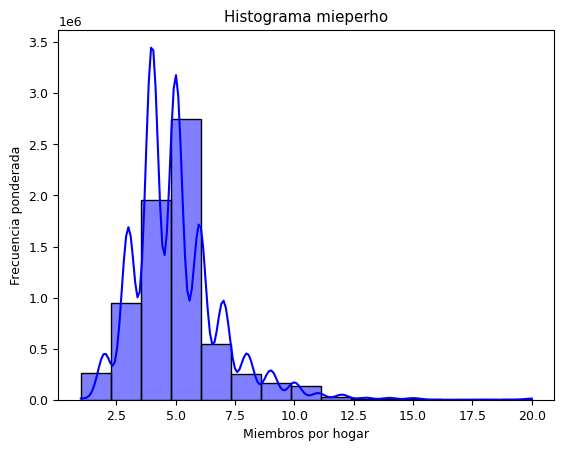

In [61]:
guardar_histograma_con_pesos(base_filtrada, 'mieperho','Miembros por hogar')

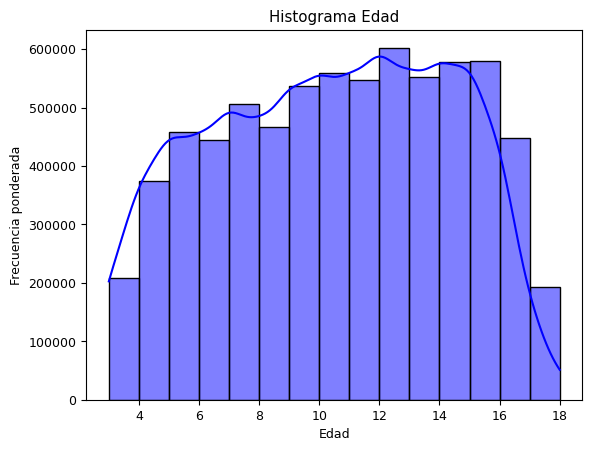

In [62]:
guardar_histograma_con_pesos(base_filtrada, 'Edad','Edad')

### V. Cualitativas - Nivel educativo y centro de estudios

#### Func. Graf de barras

In [63]:
def guardar_graf_barras(columna_categorica):
    # Crear el gráfico de barras ponderado
    ax = sns.barplot(x=columna_categorica, y='factor07', data=base_filtrada, estimator=sum)

    # Etiquetas y título
    plt.xlabel('Categoría')
    plt.ylabel('Suma de Pesos')
    plt.title(f'Gráfico de Barras Ponderado para {columna_categorica}')

    # Generar el nombre del archivo de imagen basado en el nombre de la columna
    nombre_archivo = f'grafico_barras_ponderado_{columna_categorica}.png'

    # Guardar la imagen en la ruta especificada
    ruta_guardado = '../output/images/' + nombre_archivo

    # Agregar texto con los valores en las barras
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

    # Guardar la imagen
    plt.savefig(ruta_guardado)

    # Mostrar el gráfico
    plt.show()

### Nivel educativo y centro de estudios

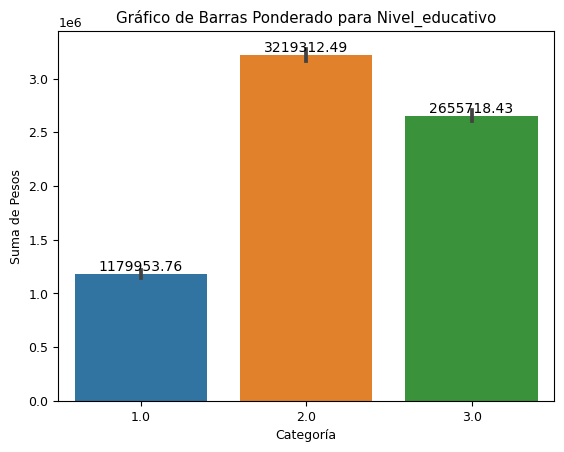

In [64]:
guardar_graf_barras('Nivel_educativo')

In [65]:
# Not 

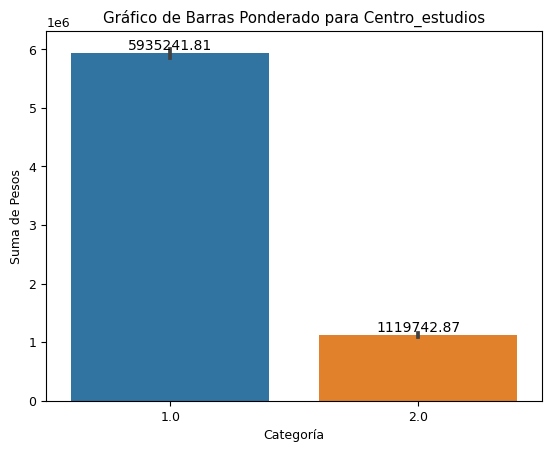

In [66]:
guardar_graf_barras('Centro_estudios')

### V.C. Idioma y Sexo

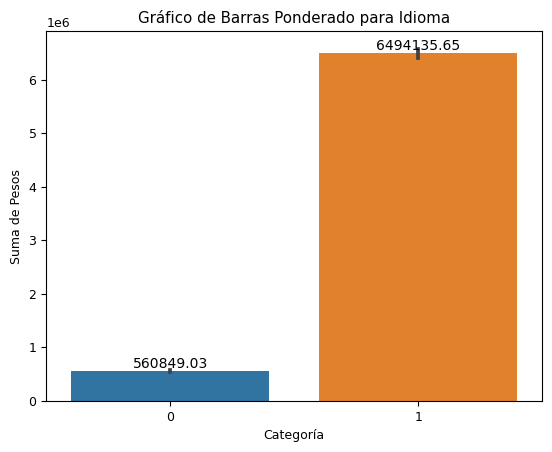

In [67]:
guardar_graf_barras('Idioma')

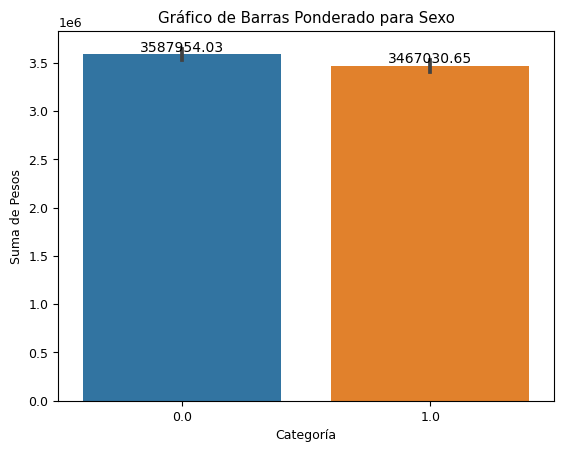

In [68]:
guardar_graf_barras('Sexo')

### Area y Estrato Social

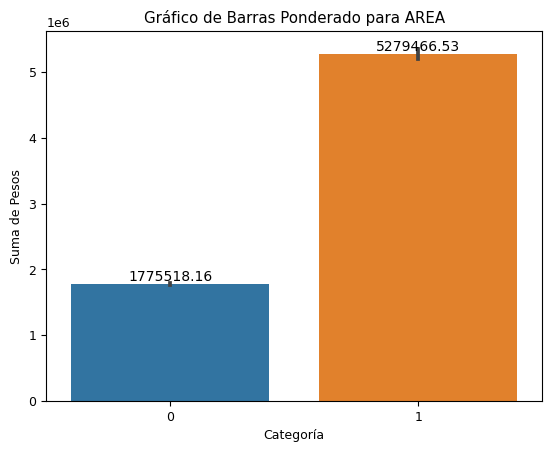

In [69]:
guardar_graf_barras('AREA')

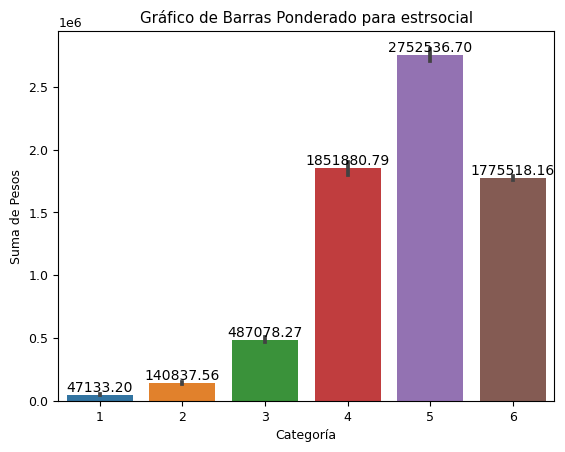

In [70]:
guardar_graf_barras('estrsocial')

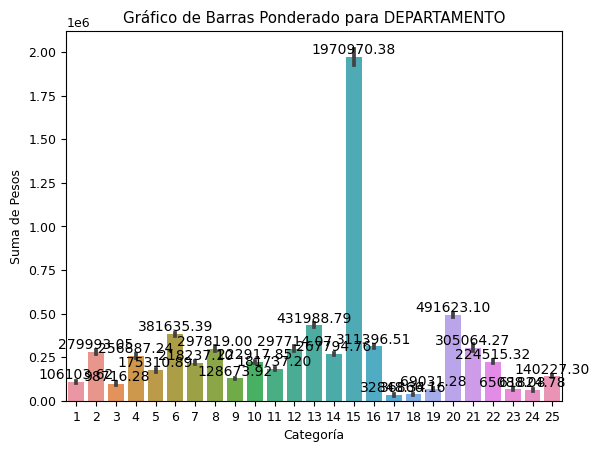

In [71]:
guardar_graf_barras('DEPARTAMENTO')

In [72]:
base_filtrada_ = base_filtrada.copy()

### Grafico de barras - USO

In [73]:
base_filtrada_['i_uso'] = base_filtrada_['i_uso'].map({2: 0, 1: 1})
base_filtrada_['i_uso_cedu'] = base_filtrada_['i_uso_cedu'].map({0: 0, 3: 1})
base_filtrada_['i_uso_trab'] = base_filtrada_['i_uso_trab'].map({0: 0, 2: 1})
base_filtrada_['i_uso_hog'] = base_filtrada_['i_uso_hog'].map({0: 0, 1: 1})
base_filtrada_['i_uso_cab'] = base_filtrada_['i_uso_cab'].map({0: 0, 4: 1})
base_filtrada_['i_uso_casotr'] = base_filtrada_['i_uso_casotr'].map({0: 0, 5: 1})
base_filtrada_['i_uso_otro'] = base_filtrada_['i_uso_otro'].map({0: 0, 6: 1})
base_filtrada_['i_uso_movil'] = base_filtrada_['i_uso_movil'].map({0: 0, 7: 1})

### Funcion

In [74]:
def barras(variable):
    freq_1 = base_filtrada_[[ "factor07",variable]].groupby([variable]).sum().reset_index()
    total_recuento = freq_1['factor07'].sum()
    freq_1['Porcentaje'] = (freq_1['factor07'] / total_recuento * 100).round(2)
    freq_1.rename(columns={variable: 'variable','factor07': 'value'}, inplace=True)
    freq_1 =  freq_1.tail(1)
    freq_1['variable'] = freq_1['variable'].replace(1.0, variable)
    freq_1['value'] = freq_1['value'].apply(lambda x: '{:,.0f}'.format(x))
    #freq_1['Porcentaje'] = freq_1['Porcentaje'].apply(lambda x: '{:.3f}'.format(x))
    
    return freq_1

### Otro

In [75]:
i_uso= barras("i_uso")
i_uso_cedu = barras("i_uso_cedu")
i_uso_trab = barras("i_uso_trab")
i_uso_hog = barras("i_uso_hog")
i_uso_cab = barras("i_uso_cab")
i_uso_casotr = barras("i_uso_casotr")
i_uso_otro = barras("i_uso_otro")
i_uso_movil = barras("i_uso_movil")

In [76]:
data3 = pd.concat([i_uso, i_uso_cedu, i_uso_trab, i_uso_hog, i_uso_cab, i_uso_casotr,i_uso_otro, i_uso_movil], axis=0)
data3 = data3.reset_index(drop=True)
data3

,variable,value,Porcentaje
0,i_uso,"4,273,676",71.070000
1,i_uso_cedu,"4,436",0.230000
2,i_uso_trab,"2,907",0.150000
3,i_uso_hog,"490,830",25.160000
4,i_uso_cab,"57,794",2.960000
5,i_uso_casotr,"40,755",2.090000
6,i_uso_otro,"22,055",1.130000
7,i_uso_movil,"1,687,514",86.489998


## plot

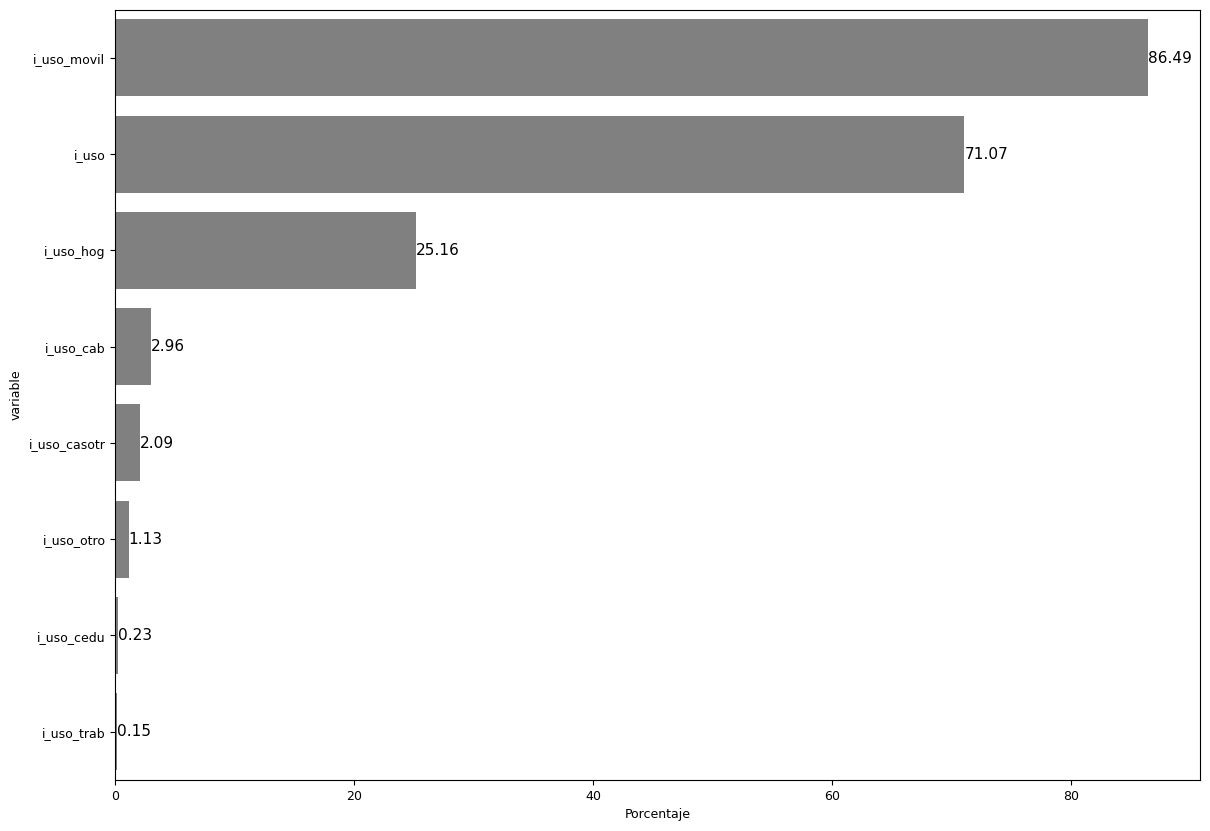

In [77]:
# Plot
plt.figure(figsize=(14,10))
ax = sns.barplot(data = data3, x = 'Porcentaje', y = 'variable', color = 'grey',
                order=data3.sort_values('Porcentaje',ascending = False).variable)

plt.bar_label(ax.containers[0], fmt='%.2f', fontsize = 11)
plt.show()

### Grafico de barras - ACCESO

In [78]:
base_filtrada_['i_computadora'] = base_filtrada_['i_computadora'].map({0: 0, 1: 1})
base_filtrada_['i_tablet'] = base_filtrada_['i_tablet'].map({0: 0, 6: 1})
base_filtrada_['i_laptop'] = base_filtrada_['i_laptop'].map({0: 0, 2: 1})
base_filtrada_['i_otro'] = base_filtrada_['i_otro'].map({0: 0, 7: 1})
base_filtrada_['i_cel_sdatos'] = base_filtrada_['i_cel_sdatos'].map({0: 0, 8: 1})
base_filtrada_['i_cel_cdatos'] = base_filtrada_['i_cel_cdatos'].map({0: 0, 9: 1})

In [79]:
i_computadora = barras("i_computadora")
i_tablet = barras("i_tablet")
i_laptop = barras("i_laptop")
i_otro = barras("i_otro")
i_cel_sdatos = barras("i_cel_sdatos")
i_cel_cdatos = barras("i_cel_cdatos")

In [80]:
data3 = pd.concat([i_computadora, i_tablet, i_laptop, i_otro, i_cel_sdatos, i_cel_cdatos], axis=0)
data3 = data3.reset_index(drop=True)
data3

,variable,value,Porcentaje
0,i_computadora,"580,812",13.590000
1,i_tablet,"98,680",2.310000
2,i_laptop,"392,707",9.190000
3,i_otro,"826,470",19.340000
4,i_cel_sdatos,"2,234,896",52.290001
5,i_cel_cdatos,"849,994",19.889999


## Plot

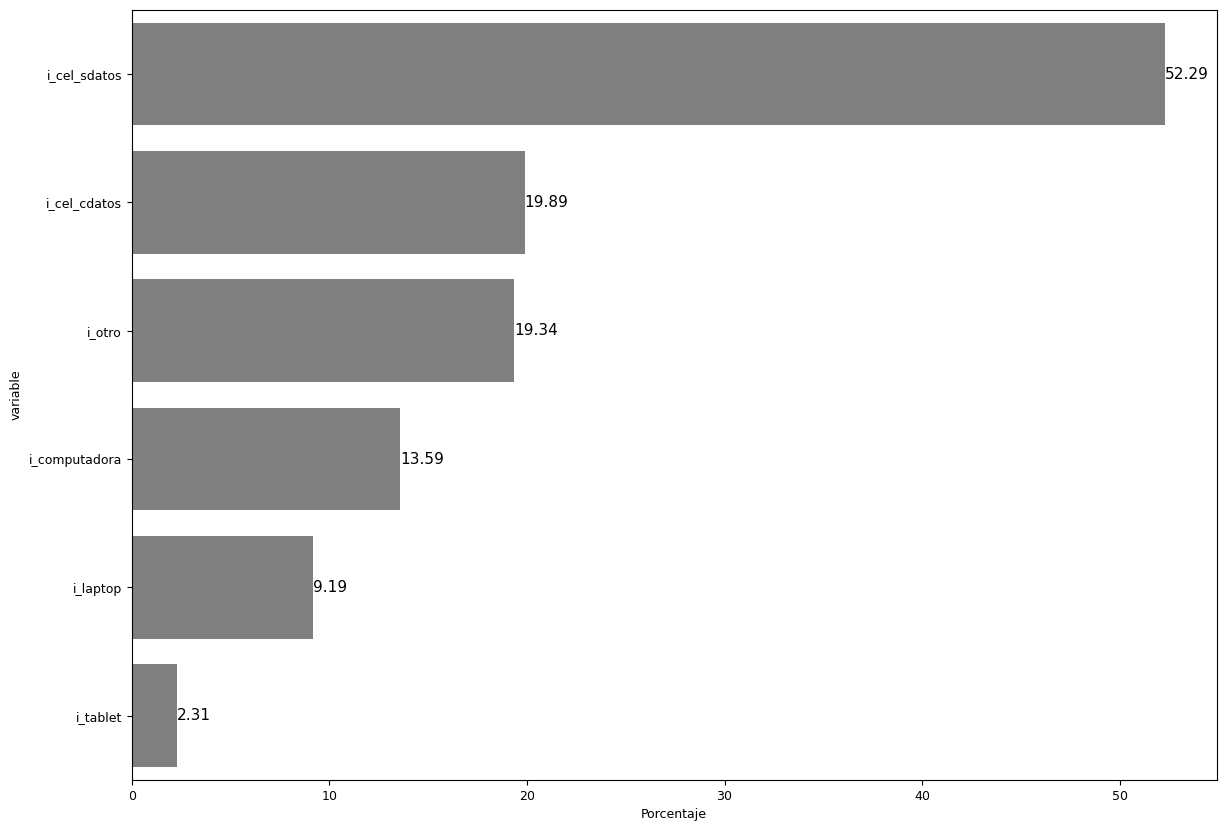

In [81]:
# Plot
plt.figure(figsize=(14,10))
ax = sns.barplot(data = data3, x = 'Porcentaje', y = 'variable', color = 'grey',
                order=data3.sort_values('Porcentaje',ascending = False).variable)

plt.bar_label(ax.containers[0], fmt='%.2f', fontsize = 11)
plt.show()

### Grafico de barras - Clases a DISTANCIA

In [82]:
base_filtrada_['clases_tv'] = base_filtrada_['clases_tv'].map({0: 0, 1: 1})
base_filtrada_['clases_radio'] = base_filtrada_['clases_radio'].map({0: 0, 2: 1})
base_filtrada_['clases_plataforma_virtual'] = base_filtrada_['clases_plataforma_virtual'].map({0: 0, 3: 1})
base_filtrada_['clases_otro'] = base_filtrada_['clases_otro'].map({0: 0, 4: 1})
base_filtrada_['clases_wsp'] = base_filtrada_['clases_wsp'].map({0: 0, 5: 1})
base_filtrada_['clases_correo'] = base_filtrada_['clases_correo'].map({0: 0, 6: 1})
base_filtrada_['clases_llamadas'] = base_filtrada_['clases_llamadas'].map({0: 0, 7: 1})

In [83]:
base_filtrada_['clases_interaccion_profesor'] = base_filtrada_['clases_interaccion_profesor'].map({0: 0, 1: 1})
base_filtrada_['clases_videos'] = base_filtrada_['clases_videos'].map({0: 0, 2: 1})
base_filtrada_['clases_documentos'] = base_filtrada_['clases_documentos'].map({0: 0, 3: 1})
base_filtrada_['clases_otros'] = base_filtrada_['clases_otros'].map({0: 0, 4: 1})
base_filtrada_['clases_msm_audio'] = base_filtrada_['clases_msm_audio'].map({0: 0, 5: 1})
base_filtrada_['clases_msm_texto'] = base_filtrada_['clases_msm_texto'].map({0: 0, 6: 1})
base_filtrada_['clases_sin_acompañamiento'] = base_filtrada_['clases_sin_acompañamiento'].map({0: 0, 7: 1})

In [84]:
clases_tv         =   barras("clases_tv")
clases_radio      = barras("clases_radio")
clases_plataforma_virtual = barras("clases_plataforma_virtual")
clases_otro       = barras("clases_otro")
clases_wsp        = barras("clases_wsp")
clases_correo     = barras("clases_correo")
clases_llamadas   = barras("clases_llamadas")
clases_interaccion_profesor = barras("clases_interaccion_profesor")
clases_videos     = barras("clases_videos")
clases_documentos = barras("clases_documentos")
clases_otros      = barras("clases_otros")
clases_msm_audio  = barras("clases_msm_audio")
clases_msm_texto  = barras("clases_msm_texto")
clases_sin_acompañamiento = barras("clases_sin_acompañamiento")

In [85]:
data3 = pd.concat([clases_tv, clases_radio, clases_plataforma_virtual, clases_otro, clases_wsp, clases_correo, clases_llamadas,
                   clases_interaccion_profesor, clases_videos, clases_documentos, clases_otros, clases_msm_audio, clases_msm_texto,
                   clases_sin_acompañamiento], axis=0)
data3 = data3.reset_index(drop=True)
data3

,variable,value,Porcentaje
0,clases_tv,"2,970,516",48.889999
1,clases_radio,"1,006,021",16.559999
2,clases_plataforma_virtual,"1,871,859",30.809999
3,clases_otro,"123,784",2.040000
4,clases_wsp,"4,031,859",66.360001
5,clases_correo,"198,134",3.260000
6,clases_llamadas,"1,739,798",28.639999
7,clases_interaccion_profesor,"3,754,060",61.790001
8,clases_videos,"3,452,729",56.830002
9,clases_documentos,"4,472,920",73.620003


## plot

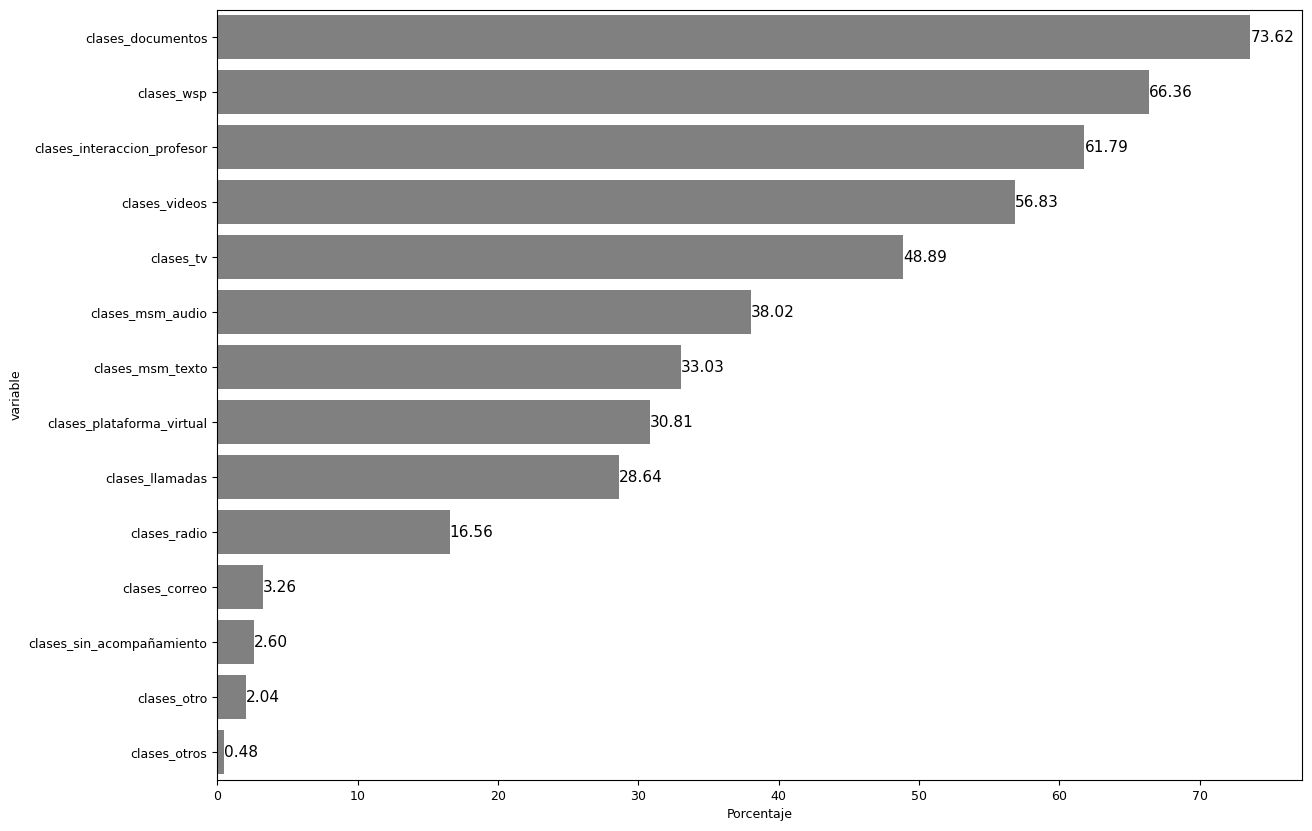

In [86]:
# Plot
plt.figure(figsize=(14,10))
ax = sns.barplot(data = data3, x = 'Porcentaje', y = 'variable', color = 'grey',
                order=data3.sort_values('Porcentaje',ascending = False).variable)

plt.bar_label(ax.containers[0], fmt='%.2f', fontsize = 11)
plt.show()

# Regresión

In [87]:
base_filtrada['i_uso_hog'].value_counts()
missing_values = base_filtrada['i_uso_hog'].isna().sum()
print("Número de valores faltantes en 'i_uso_hog':", missing_values)

Número de valores faltantes en 'i_uso_hog': 20647


In [88]:
base_filtrada.shape

(26899, 88)

In [89]:
base_filtrada = base_filtrada.dropna(subset=['i_uso_hog'])
weights = base_filtrada['factor07']

In [90]:
# Definir las variables dependientes, independientes y los pesos
y = base_filtrada['i_uso_hog']
X = base_filtrada[['mieperho','Nivel_educativo','Centro_estudios','Idioma','Sexo','AREA','estrsocial','Edad',
                   'Electricidad'
                  ## 'ZONA'
                  ]] 
#X = base_filtrada[['mieperho','p308a','p308d','p300a','p207','AREA','estrsocial','p208a','p1121']]  # Agrega aquí tus otras variables independientes


In [91]:
# los nombres de las variables deben respresentar al menos una idea de lo que represento
# Revisar qué variables son categoricas y continuas 


In [92]:
# Define la variable dependiente (binaria) y las variables independientes
y = base_filtrada['i_uso_hog']
X = base_filtrada[['mieperho', 'Nivel_educativo', 'Centro_estudios', 'Idioma', 'Sexo', 'AREA', 'estrsocial', 'Edad', 'Electricidad']]

# Codifica la variable categórica ordinal "Nivel_educativo" en variables dummy
nivel_educativo_dummies = pd.get_dummies(base_filtrada['Nivel_educativo'], prefix='Nivel_educativo', drop_first=True)

# Codifica la variable categórica nominal "ZONA" en variables dummy
zona_dummies = pd.get_dummies(base_filtrada['ZONA'], prefix='ZONA', drop_first=True)

# Codifica la variable categórica nominal "ZONA" en variables dummy
departamento_dummies = pd.get_dummies(base_filtrada['DEPARTAMENTO'], prefix='DEPARTAMENTO', drop_first=True)

# Combina las variables dummy con el conjunto de variables independientes
X = pd.concat([X, nivel_educativo_dummies, zona_dummies, departamento_dummies], axis=1)

## Regresión Lineal SIMPLE

In [93]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              i_uso_hog   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     73.99
Date:                Sat, 30 Sep 2023   Prob (F-statistic):               0.00
Time:                        09:24:10   Log-Likelihood:                -2328.1
No. Observations:                6252   AIC:                             4732.
Df Residuals:                    6214   BIC:                             4988.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
mieperho               -0.0004    

## Modelo Logit

## Modelo Probit

In [94]:
# Agregar una constante al conjunto de datos (intercepto)
X = sm.add_constant(X)

# Ajustar el modelo Probit ponderado
model_probit = sm.Probit(y, X, weights=weights)
results_probit = model_probit.fit()

# Imprimir los resultados del modelo Probit
print(results_probit.summary())

# Calcula los efectos marginales
efectos_marginales = results_probit.get_margeff()
print(efectos_marginales.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['weights']
  warnings.warn(msg, ValueWarning)


         Current function value: 0.380601
         Iterations: 35
                          Probit Regression Results                           
Dep. Variable:              i_uso_hog   No. Observations:                 6252
Model:                         Probit   Df Residuals:                     6214
Method:                           MLE   Df Model:                           37
Date:                Sat, 30 Sep 2023   Pseudo R-squ.:                  0.2958
Time:                        09:24:11   Log-Likelihood:                -2379.5
converged:                      False   LL-Null:                       -3378.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -5.5519        nan        nan        nan         nan         nan
mieperho               -0.0045      0.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['weights']
  warnings.warn(msg, ValueWarning)


       Probit Marginal Effects       
Dep. Variable:              i_uso_hog
Method:                          dydx
At:                           overall
                         dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
mieperho               -0.0010      0.003     -0.358      0.720      -0.006       0.004
Nivel_educativo        -0.1630        nan        nan        nan         nan         nan
Centro_estudios         0.1986      0.009     21.408      0.000       0.180       0.217
Idioma                  0.0920      0.035      2.629      0.009       0.023       0.161
Sexo                    0.0186      0.009      2.120      0.034       0.001       0.036
AREA                    0.0692      0.018      3.877      0.000       0.034       0.104
estrsocial             -0.0734      0.004    -16.878      0.000      -0.082      -0.065
Edad                 -9.91e-05      0.003     -0.037    

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_margins.py:343: RuntimeWarning: invalid value encountered in sqrt
  return cov_me, np.sqrt(np.diag(cov_me))


In [95]:
#.